Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Generate Two Linearly Separable Data Sets

In [ ]:
centers = [(0, 0), (4, 4)]
cluster_std = [1, 1]

X, y = make_blobs(n_samples=500, cluster_std= cluster_std, centers = centers, n_features=2, random_state=6)

Split Train and Test Data and Plot the Train Data

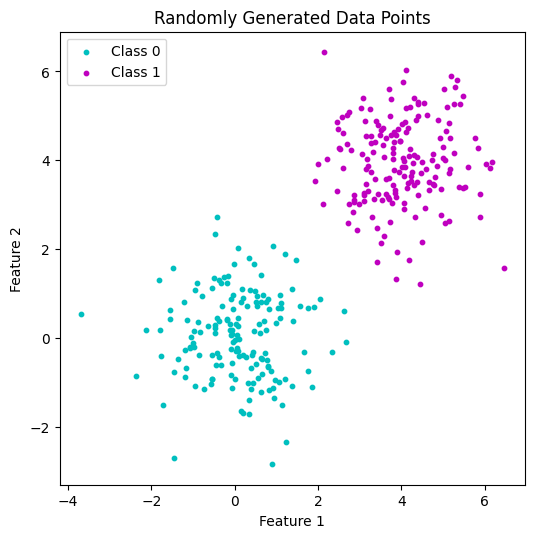

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fig = plt.figure(figsize=(6,6), dpi = 100)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="c", s=10, label="Class 0")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="m", s=10, label="Class 1")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Randomly Generated Data Points')
plt.show()

In [ ]:
print (np.shape(X_train))
print (np.shape(y_train))
print (np.shape(X_test))
print (np.shape(y_test))

(335, 2)
(335,)
(165, 2)
(165,)


Creating Generalized Perceptron Model

In [ ]:
w_store = []

def unit_step_func(z):
        return 1.0 if (z > 0) else 0.0

def perceptron(X, y, learning_rate, epochs):
    
    # m = number of training points
    # n = number of features 
    m, n = X.shape
    
    # Initializing parameters(w) to zeros.
    w = np.zeros((n+1, 1))
    w_batch = np.zeros((m, n+1, 1))
    
    for i in range(n+1):
      w[i][0] = random.random()
    
    # Empty list to store number of missclassified points in each iteration
    miss_list = []
    
    # Training
    for epoch in range(epochs):
        miss = 0

        for idx, xi in enumerate(X):
            
            # Insering 1 for bias.
            xi = np.insert(xi, 0, 1).reshape(-1,1)
            
            # To Calculate prediction.
            y_hat = unit_step_func(np.dot(xi.T, w))
            
            # Update if the point is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w_batch[idx] += learning_rate*((y[idx] - y_hat)*xi)
                miss += 1
              
        sum = 0
        for i in range(m):
          sum += w_batch[i]
        w = sum/m
        
        # Appending number of misclassified examples
        # at every iteration.
        miss_list.append(miss)
        w_store.append(w)
        
    return w, miss_list

Function to Plot Decision Boundary

In [ ]:
def plot_decision_boundary(X, w):
  
    # Equating mx+c = w0.X0 + w1.X1 + w2.X2
    x1 = [min(X_train[:,0]), max(X_train[:,0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(6,6), dpi = 100)
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="c", s=10, label="Class 0")
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="m", s=10, label="Class 1")
    plt.legend()
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title('Plot Decision Line')
    plt.plot(x1, x2, 'b-')

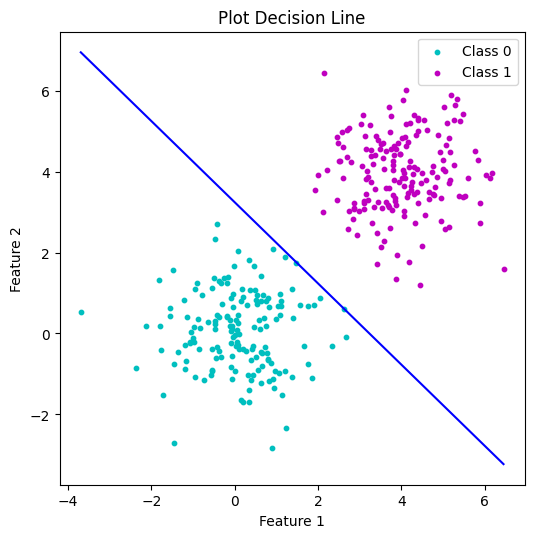

In [ ]:
w, miss_l = perceptron(X_train, y_train, 0.1, 50)
plot_decision_boundary(X_train, w)

Plotting Iterations vs. Number of missclassified points in Each Iteration

Text(0, 0.5, 'Error( number of misclassified points)')

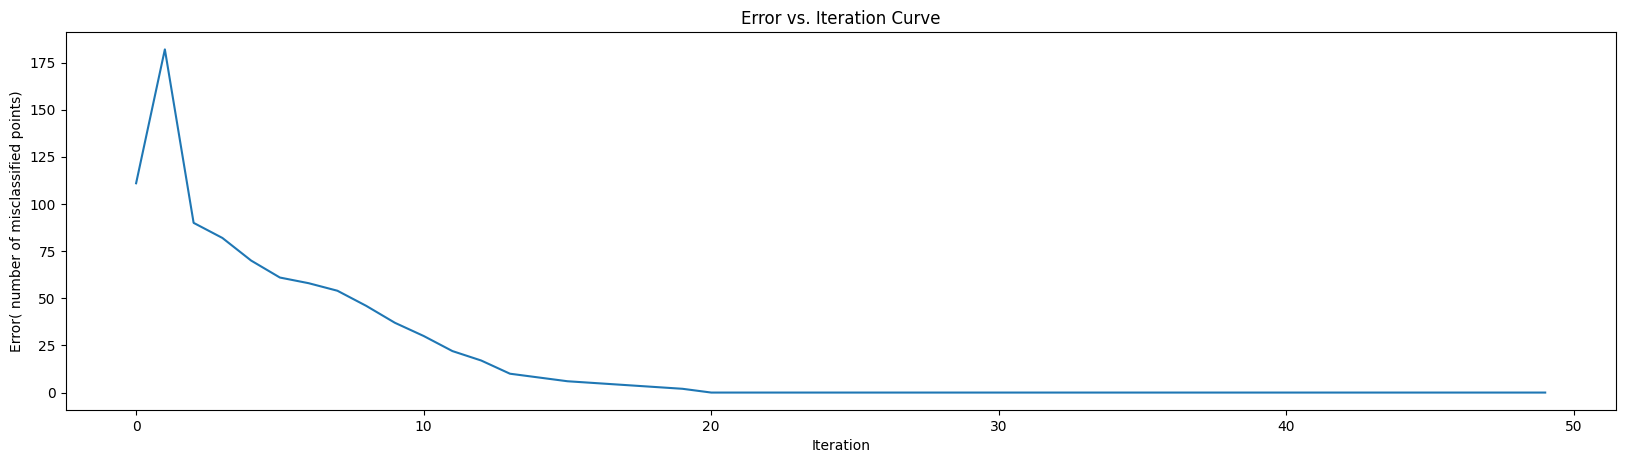

In [ ]:
fig = plt.figure(figsize=(20,5), dpi = 100)
plt.plot(miss_l)
plt.title('Error vs. Iteration Curve')
plt.xlabel('Iteration')
plt.ylabel('Error( number of misclassified points)')

Creating Video

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation 
from IPython import display
   
# initializing a figure in 
# which the graph will be plotted
fig = plt.figure() 
 
# marking the x-axis and y-axis
axis = plt.axes(xlim =(min(X[:,0]) - 2, max(X[:,0]) + 2), 
                ylim =(min(X[:,1]) - 2, max(X[:,1]) + 2))
  
# initializing a line variable
line, = axis.plot([], [], lw = 2) 
   
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data([], [])
    return line,

def animate(i):  
    plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'cp', markersize = 1)
    plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'mp', markersize = 1)
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w_store[i][1]/w_store[i][2]
    c = -w_store[i][0]/w_store[i][2]
    x2 = m*x1 + c
    
    line.set_data(x1, x2)
    return line,

anim = FuncAnimation(fig, animate, frames = 50, repeat = True, blit = True)  # frames = epochs

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
len(w)

3

In [ ]:
# def predict(weights, test):
#   activation = weights[0]
#   for i in range(1, len(weights)):
#     activation += weights[i]*test[(i-1)]
#   return 1.0 if activation > 0.0 else 0.0

prediction function

In [ ]:
def predict(weights, test):
  activation = weights[0] + weights[1]*test[0] + weights[2]*test[1]
  return 1.0 if activation > 0.0 else 0.0

In [ ]:
y_pred = []
for i in range(len(X_test)):
  y_pred.append(predict(w, X_test[i]))

Creating Confusion Matrix

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[90  0]
 [ 0 75]]


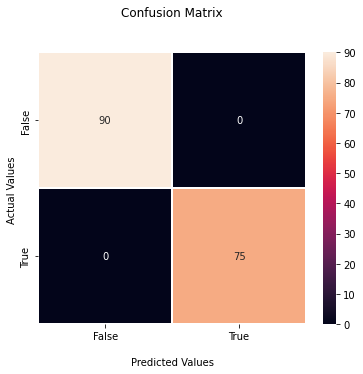

In [ ]:
# ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# ax.set_title('Seaborn Confusion Matrix\n\n');
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Other metircs for classification

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('f1 score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1 score: 1.000


# Iris Data

Import Data

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

In [ ]:
for i in range(len(df)):
  if df[4][i] == 'Iris-setosa':
    df[4][i] = 1
  else:
    df[4][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Creating X, y from the dataframe as numpy arrays

In [ ]:
y = df[4].to_numpy(dtype = 'int')
X = (df.drop([4], axis = 1)).to_numpy()

Splitting the train and test sets from X and y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 4)
(50, 4)
(100,)
(50,)


prediction function

In [ ]:
def predict_(weights, test):
  activation = weights[0] + weights[1]*test[0] + weights[2]*test[1] + weights[3]*test[2] + weights[4]*test[3]
  return 1.0 if activation > 0.0 else 0.0

In [ ]:
w, miss_l = perceptron(X_train, y_train, 0.1, 50)

Plotting Error vs. Iteration Curve

Text(0, 0.5, 'Error( number of misclassified points)')

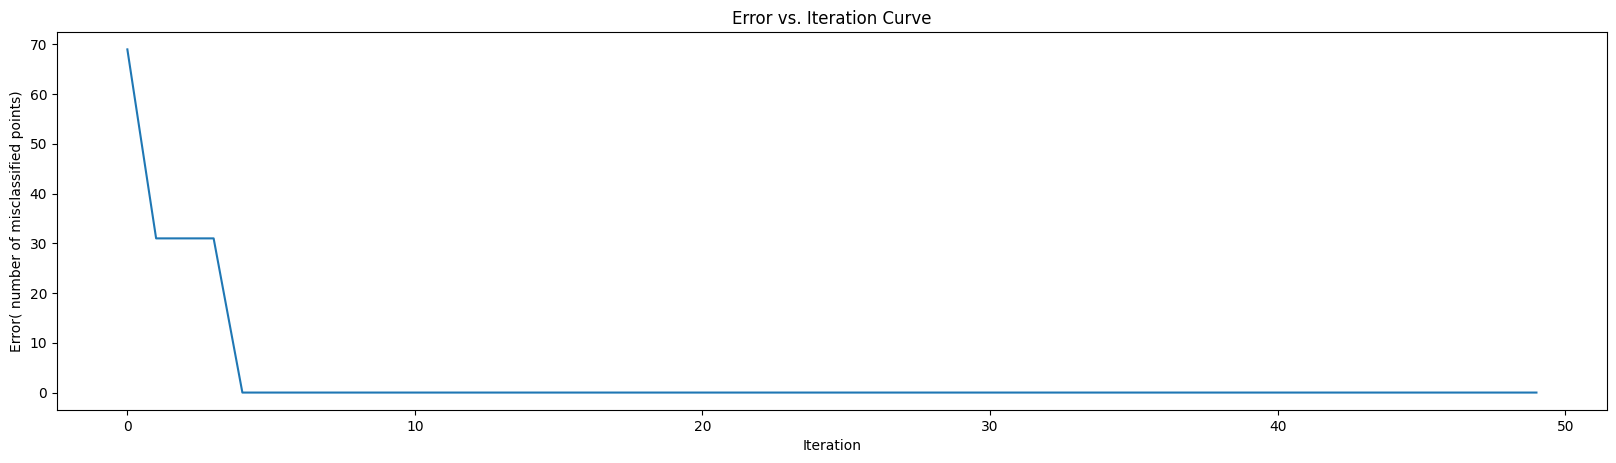

In [ ]:
fig = plt.figure(figsize=(20,5), dpi = 100)
plt.plot(miss_l)
plt.title('Error vs. Iteration Curve')
plt.xlabel('Iteration')
plt.ylabel('Error( number of misclassified points)')

In [ ]:
y_pred = []
for i in range(len(X_test)):
  y_pred.append(predict_(w, X_test[i]))

Generate Confusion Matric

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[31  0]
 [ 0 19]]


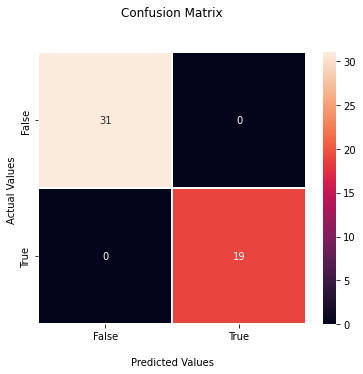

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('f1 score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1 score: 1.000
